# Gráficos y mapas en Python con `geopandas` y `matplotlib` -  Operaciones con polígonos

En la clase anterior pudimos ver operaciones espaciales con geometrías más sencillas como **Punto** y **Línea**. En esta clase vamos a trabajar con polígonos, analizar las propiedades de éstas geometrías y el tipo de operaciones que permiten. A su vez, profundizaremos un poco más en las herramientas de visualización que nos ofrece la librería `matplotlib`.

Utilizaremos como ejemplo el set de datos de [información censal por radio](https://data.buenosaires.gob.ar/dataset/informacion-censal-por-radio). Este dataset identifica cada radio censal con un polígono y ofrece infrmación censal básica como el total de hogares, viviendas y población. También algunos indicadores como NBI. El código que identifica de manera únivoca el radio es el **CO_FRAC_RA**, que es un concatenado de COMUNA, FRACCION y RADIO. Las fracciones y los radios son unidades censales definidas por un espacio territorial con límites geográficos y una determinada cantidad de unidades de viviendas a relevar. Corresponden a distintos niveles de la estructura censal y determinar cargas equilibradas para cada uno de ellos asegura un mejor control de la cobertura territorial, facilita la distribución y recuperación de los materiales censales y determina en gran parte la calidad y el buen desarrollo del operativo Para mayor información pueden consultar [aquí](https://www.santafe.gov.ar/index.php/web/content/download/201877/978757/file/definicion%20localidad%20-%20fracci%C3%B3n%20y%20radio%20censal.pdf).

Existe mucho debate sobre si utilizar radios censales como unidades del análisis espacial. En la medida en que nuestro análisis pretende dar cuenta de un fenómeno por debajo del cual subyace un proceso espacial, siempre es mejor utilizar unidades geográficas vinculadas a dicho proceso. Los radios censales no siempre se adecúan a esta situación y tienen numerosos problemas. Sin embargo, constituyen la fuente de información más desagregada y de mayor extensión territorial sobre personas, hogares y vivendas con la que contamos.

Pueden consultar el mapa interactivo de radios de [INDEC](https://geoservicios.indec.gov.ar/codgeo/index.php?pagina=mapas) que puede ser de mucha ayuda. 

In [1]:
!pip install geopandas mapclassify contextily palettable

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 6.5MB 13.2MB/s 
     |████████████████████████████████| 14.8MB 251kB/s 
     |████████████████████████████████| 18.3MB 122kB/s 


In [2]:
#importamos las librerias de siempe
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

# 1 - Poligonos

In [3]:
#leemos el shapefile que utilizaremos como información principal
radios = gpd.read_file('https://github.com/alephcero/untref_analisis_espacial_2020/raw/master/carto/caba_radios_censales.geojson')
#convertimos los ID en indices reales
radios.index = radios.RADIO_ID.values
radios.head()

,RADIO_ID,BARRIO,COMUNA,POBLACION,VIVIENDAS,HOGARES,HOGARES_NBI,AREA_KM2,geometry
1_1_1,1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-58.37189 -34.59199, -58.37202 -34.5..."
1_12_1,1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-58.38593 -34.60444, -58.38575 -34.6..."
1_12_10,1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-58.37879 -34.60528, -58.37741 -34.6..."
1_12_11,1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-58.36733 -34.60562, -58.36713 -34.6..."
1_12_2,1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-58.38454 -34.60436, -58.38311 -34.6..."


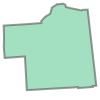

In [7]:
#analizamos la geometria de un radio
#usando el indice es mas facil
radios.loc['1_14_2','geometry']

In [5]:
#vemos el tipo
type(radios.loc['1_14_2'].geometry)

shapely.geometry.polygon.Polygon

In [8]:
#los polígonos tiene un area
poligono = radios.loc['1_14_2'].geometry
poligono.area

2.7216023690037475e-05

In [9]:
#también una longitud
poligono.length

0.022891395531879816

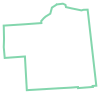

In [10]:
#tiene un exterior
poligono.exterior

In [11]:
#el tipo es especifico, no es solo una linea
type(poligono.exterior)

shapely.geometry.polygon.LinearRing

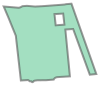

In [12]:
#y un interior tambien
poligono_con_interior = radios.loc['1_13_1','geometry']
poligono_con_interior

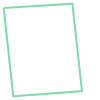

In [13]:
poligono_con_interior.interiors[0]

In [14]:
#podemos sacar las coordenadas de un poligono 
list(poligono.exterior.coords)

[(-58.368769835813715, -34.6069705567005),
 (-58.368654780097806, -34.607036243501376),
 (-58.368624176029385, -34.607183675716),
 (-58.36848611453629, -34.60721384762791),
 (-58.36823291322633, -34.607272117587144),
 (-58.36778454066985, -34.607362366965745),
 (-58.36755913372025, -34.60741110273389),
 (-58.36741685560397, -34.607369089806774),
 (-58.367128643968904, -34.60735999104281),
 (-58.36695415710729, -34.60889156232119),
 (-58.366663159955344, -34.61144502462584),
 (-58.366531329309204, -34.612607750549564),
 (-58.36678062245984, -34.612625975170154),
 (-58.36676904559529, -34.61269371328926),
 (-58.367358335852394, -34.612739598266955),
 (-58.367791254572616, -34.61277338688929),
 (-58.36779627676861, -34.61270141817625),
 (-58.36827961571449, -34.612739469675546),
 (-58.368577548348355, -34.61275561555945),
 (-58.36876288333437, -34.6127656176662),
 (-58.36898492763181, -34.61277761954793),
 (-58.369182016417604, -34.61278833427922),
 (-58.36993084735887, -34.61283327267218

In [15]:
#pero hay otros tipos
type(radios.loc['12_16_7','geometry'])

shapely.geometry.multipolygon.MultiPolygon

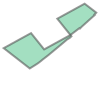

In [16]:
#veamos esta geometria
radios.loc['12_16_7','geometry']

In [17]:
# tiene 2 elementos, 2 poligonos
len(radios.loc['12_16_7','geometry'])

2

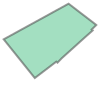

In [18]:
radios.loc['12_16_7','geometry'][0]

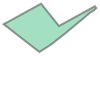

In [19]:
radios.loc['12_16_7','geometry'][1]

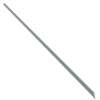

In [20]:
#aunque puede ser solo un ma dibujo
radios.loc['8_1_9','geometry'][0]

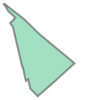

In [21]:
radios.loc['8_1_9','geometry'][1]

# 2 - Coropletas

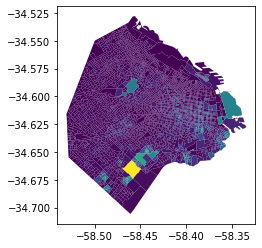

In [22]:
#podemos hacer una coropleta con una sola linea
radios.plot(column='HOGARES_NBI')

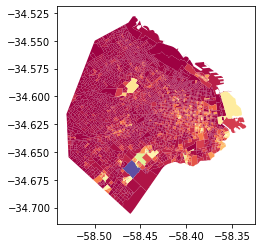

In [23]:
#podemos elegir otra paleta de colores
radios.plot(column='HOGARES_NBI',cmap='Spectral')

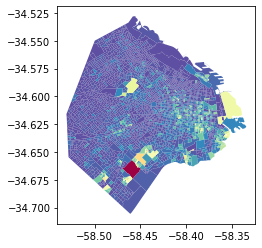

In [24]:
#cada paleta tiene su inverso
radios.plot(column='HOGARES_NBI',cmap='Spectral_r')

In [25]:
#creamos una variable de porcentaje de hogares con NBI
radios['NBI'] = radios.HOGARES_NBI / radios.HOGARES * 100

In [26]:
#cuidado, que hay 0 en el denominador
radios.HOGARES.min()

0.0

In [27]:
#esto genera que haya nulls en NBI porque no se puede dividir por 0
radios.HOGARES.isnull().sum()

0

In [28]:
radios.shape

(3554, 10)

In [29]:
#borramos los NA
radios_nbi = radios.dropna(axis='index',subset=['NBI'])
radios_nbi.shape

(3552, 10)

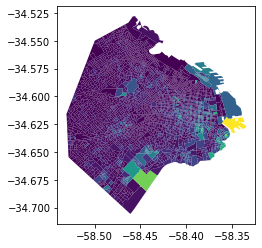

In [30]:
radios_nbi.plot(column='NBI')

## Ejes, figuras y paletas: otros elementos de visualización

Ahora profundizaremos en los elementos que conforman un gráfico como las [figuras](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html) y los [ejes y subplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html). Pueden ver un [tutorial básico](https://matplotlib.org/users/pyplot_tutorial.html) de Matplotlib en su página. 

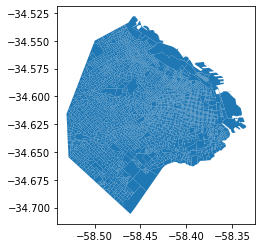

In [31]:
#anteriormente haciamos los mapas del siguiente modo, con mas lineas de codigo
fig = plt.figure()
ejes = fig.add_subplot(1,1,1)
radios.plot(ax=ejes)

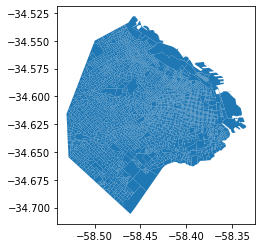

In [32]:
#forma breve de hacer un par de ejes y una figura en una sola linea
f, ax = plt.subplots()
#hacemos un plot y lo asignamos a esos ejes
radios.plot(ax=ax)

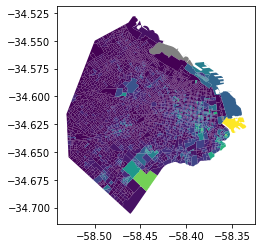

In [37]:
f, ax = plt.subplots()
radios.loc[radios.HOGARES==0,:].plot(ax=ax,color='grey')
radios_nbi.plot(ax=ax,column='NBI')


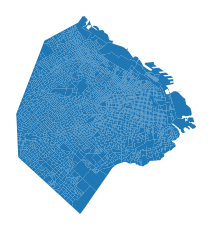

In [38]:
f, ax = plt.subplots()
radios.plot(ax=ax)
#evitamos la visualizacion de los ejes, innecesaria en mapas
ax.set_axis_off()

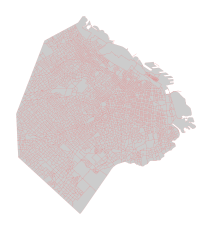

In [41]:
f, ax = plt.subplots()
#agregamos algunas especificaciones sobre los colores a los diferentes elementos del polígono
radios.plot(linewidth=0.1,
            facecolor='grey',
            edgecolor='red', ax=ax, alpha = 0.4)
ax.set_axis_off()

In [42]:
#vamos a cargar unos shapes que sirven de insumo para la visualizacion
rios = gpd.read_file('https://github.com/alephcero/untref_analisis_espacial_2020/raw/master/carto/rios.geojson')
rios = rios.to_crs(radios.crs)
parques = gpd.read_file('https://github.com/alephcero/untref_analisis_espacial_2020/raw/master/carto/parques.geojson')
parques = parques.to_crs(radios.crs)

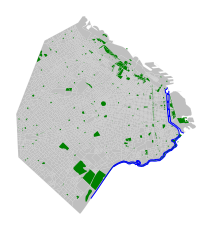

In [43]:
f, ax = plt.subplots()
radios.plot(linewidth=0.1, facecolor='grey', edgecolor='white', ax=ax, alpha = 0.5)
#agregamos al plot los rios y los parques
rios.plot(ax=ax, color='blue',linewidth=1)
parques.plot(ax=ax, color='green')
ax.set_axis_off()


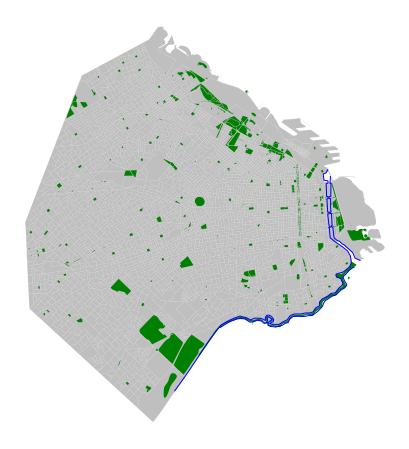

In [44]:
#agregamos especificacion sobre el tamaño de la figura
f, ax = plt.subplots(figsize=(8,8))
radios.plot(linewidth=0.1, facecolor='grey', edgecolor='white', ax=ax, alpha = 0.5)
#agregamos al plot los rios y los parques
rios.plot(ax=ax, color='blue',linewidth=1)
parques.plot(ax=ax, color='green')
ax.set_axis_off()

# 3 - Paletas de colores

También existen paletas de colores predefinidas que podemos utilizar, como las que usamos previamente *Spectral*. El uso de la paleta no es inocente y hay estrategias de visualización que uno puede seguir de acuerdo a si quiere mostrar constrastes con paletas divergentes o mostrar intensidades variantes con paletas gradientes, etc. Para más información y mayor nivel de detalle sobre las paletas o mapas de colores pueden consultar el sitio de [Matplotlilb](https://matplotlib.org/users/colormaps.html)

Veamos como se construyen los colores y paletas en Python. Usaremos como ejemplo la paleta Terrain.

![terrain](https://github.com/alephcero/untref_analisis_espacial_2020/raw/master/img/terrain_matplotlib.png)

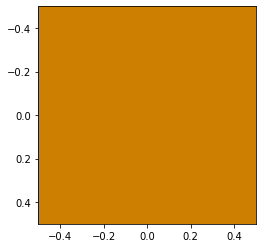

In [47]:
cantidad_rojo = 0.8
cantidad_verde = 0.5
cantidad_azul = 0.0
color = np.array([[cantidad_rojo,cantidad_verde,cantidad_azul]])
plt.imshow([color])

In [48]:
from matplotlib.colors import rgb2hex

In [50]:
#Utilzaremos la paleta terrain
cm = plt.get_cmap('terrain')
cm

In [51]:
#que tipo es?
type(cm)

matplotlib.colors.LinearSegmentedColormap

In [52]:
#entonces como accedo a los colores que estan dentro de la paleta si no hay un list?
list(cm)

TypeError: ignored

In [53]:
#entre 0. y 1. tengo el gradiente de colores del mapa (no es lo mismo 1 que 1., prueben)
cm(0.)

(0.2, 0.2, 0.6, 1.0)

In [54]:
#1 es todo luz en todas los canales de colores
cm(1.)

(1.0, 1.0, 1.0, 1.0)

In [55]:
#obtengo 3 colores
cm([0.,0.5,1.])

array([[0.2       , 0.2       , 0.6       , 1.        ],
       [0.99607843, 0.99498039, 0.59788235, 1.        ],
       [1.        , 1.        , 1.        , 1.        ]])

In [56]:
#quiero 3 colores entre 0 y 1
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [61]:
#creamos nuestra paleta
colores = cm(np.linspace(0,1,4))

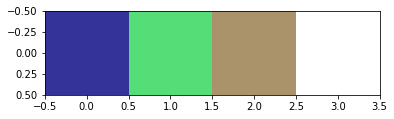

In [62]:
#la visualizamos
plt.imshow([colores])

In [63]:
#creamos nuestros colores a partir de una paleta
azul = rgb2hex(colores[0][:3])
verde = rgb2hex(colores[1][:3])
tierra = rgb2hex(colores[2][:3])

In [64]:
rgb2hex(colores[0])

'#333399'

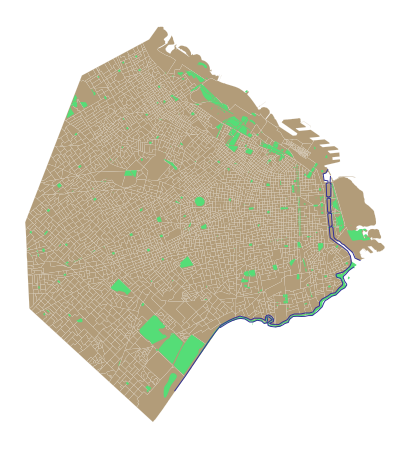

In [65]:
#usamos nuestros colores en un mapa
f, ax = plt.subplots(1,figsize=(8,8))
radios.plot(linewidth=0.1, facecolor=tierra, edgecolor='white', ax=ax, alpha = 0.9)
rios.plot(ax=ax, color=azul,linewidth=1)
parques.plot(ax=ax, color=verde)
ax.set_axis_off()
plt.show()

Probablemente sea el mapa más feo jamás hecho. Por eso pueden usar colores totalmente definidos por ustedes. Una página que es un gran recurso para obtener colores es [Paletton](http://paletton.com/)  

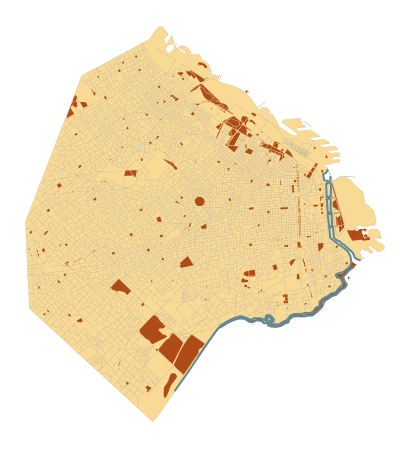

In [66]:
f, ax = plt.subplots(1,figsize=(8,8))
radios.plot(linewidth=0.1, facecolor='#F9DA95', edgecolor='#787064', ax=ax, alpha = 1)
rios.plot(ax=ax, color='#618A98',linewidth=2)
parques.plot(ax=ax, color='#AE4B16')
ax.set_axis_off()
plt.show()

In [69]:
# Finalmente podemos guardar nuestro mapa en una imagen PNG
f.savefig('buenos_aires.png', dpi=1080)

In [70]:
#podemos usar otra librerias de paletas
#https://jiffyclub.github.io/palettable/
from palettable.wesanderson import Darjeeling3_5 
from matplotlib.colors import ListedColormap

In [71]:
cmap = ListedColormap(Darjeeling3_5.mpl_colors,N=5)
cmap

In [72]:
cmap.colors

[(0.6588235294117647, 0.6705882352941176, 0.3137254901960784),
 (1.0, 0.9098039215686274, 0.23921568627450981),
 (0.6627450980392157, 0.8274509803921568, 0.8235294117647058),
 (0.1411764705882353, 0.2784313725490196, 0.49019607843137253),
 (0.35294117647058826, 0.5686274509803921, 0.48627450980392156)]

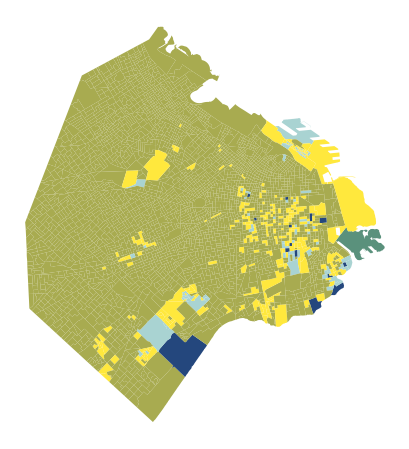

In [73]:
f, ax = plt.subplots(1,figsize=(8,8))
radios_nbi.plot(ax=ax,column='NBI',cmap=cmap)
ax.set_axis_off()

# 4 - PUEM: Analisis de NBI por diferentes unidades espaciales

Comentamos que los radios no siempre constituyen unidades espaciales que den cuenta de los procesos subyacentes que inciden en nuestros datos. Es por eso que muchas veces vamos a querer partir de radios censales y llevar los datos a otras unidades espaciales. Por ejemplo, podemos considerar que las COMUNAS pueden ser geografías sginificativas en este sentido. Este procedimiento tiene su versión más sencilla (veremos otras más complejas más adelante) cuando tenemos unidades espaciales anidadas. Es decir, que se contienen mutuamente tal cual sucede con las COMUNAS, FRACCIONES y RADIOS. Procuraremos realizar un análisis de la distribución de NBI por comuna.  

In [74]:
radios_nbi.NBI.describe()

count    3552.000000
mean        6.151398
std         9.595624
min         0.000000
25%         0.605603
50%         1.884256
75%         7.588378
max        88.888889
Name: NBI, dtype: float64

In [77]:
#usamos otra paleta que nos agrade
from palettable.cartocolors.diverging import TealRose_7
cmap = ListedColormap(TealRose_7.mpl_colors)

In [85]:
radios_nbi.plot?

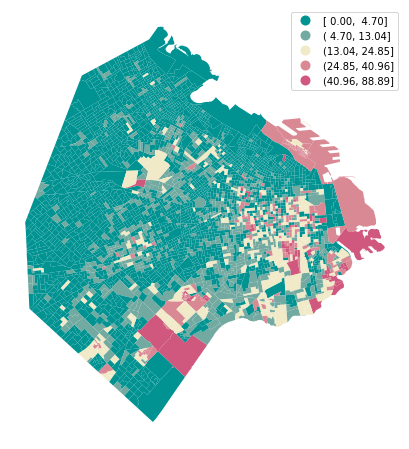

In [89]:
f, ax = plt.subplots(1,figsize=(8,8))
#realizamos el mismo mapa, ahora graficando por quintiles
radios_nbi.plot(column='NBI',
                linewidth=0.1,
                ax=ax,
                cmap = cmap,
                scheme = 'Fisher_Jenks',k=5,
                legend=True)
ax.set_axis_off()



## Los datos en tablas

In [90]:
#nosotros ya sabemos de la clase anterior como obtener un estadístico resumen agrupado por una variable común
tabla_nbi = radios_nbi.loc[:,['COMUNA','NBI']].groupby('COMUNA').mean()
tabla_nbi.sort_values(by='NBI',ascending = False).head()

,NBI
COMUNA,
1,15.711973
4,12.827940
3,12.194240
8,9.443664
7,7.814530


In [91]:
#tenemos otra forma similar de lograr lo mismo, pasando una funcion que será agregada para todos los elementos de la misma comuna
#en este caso la funcion promedio de numpy
tabla_nbi = radios_nbi.loc[:,['COMUNA','NBI']].groupby('COMUNA').agg(np.average)
tabla_nbi.sort_values(by='NBI',ascending = False).head()

,NBI
COMUNA,
1,15.711973
4,12.827940
3,12.194240
8,9.443664
7,7.814530


## Estadísticos simples o ponderados ¿Por qué agregar esta complejidad? 

Porque nuestro análisis requiere ser más complejo. No podemos hacer un promedio simple del NBI dado que no existe la misma cantidad de hogares en cada radio. Por lo tanto, lo que debemos hacer es un promedio ponderado. Nuestra función que se agregue debe realizar un promedio con pesos. Afortundamente la función de promedios de `Numpy` nos permite hacer esto. 

Veamos un ejemplo sencillo que luego escalaremos al conjunto de los datos:

In [94]:
#creemos un caso sencillo para probar y luego si funciona podemos extrapolar 
dt = pd.DataFrame({'COMUNA':[1,1,2,2],
                  'NBI':[50.,10.,90.,10],
                   'HOGARES':[1,5,100,2]})
dt

,COMUNA,NBI,HOGARES
0,1,50.0,1
1,1,10.0,5
2,2,90.0,100
3,2,10.0,2


In [96]:
dt.loc[:,['COMUNA','NBI']].groupby('COMUNA').agg(np.average)

,NBI
COMUNA,
1,30.0
2,50.0


In [97]:
np.average?

In [ ]:
np.average(a = dt.NBI)

In [98]:
np.average(a = dt.NBI,weights = dt.HOGARES)

84.44444444444444

#### ¿Cómo funciona GroupBy con Aggregate?

Funciona de modo similar a si hiciesemos los siguientes pasos:

* Separamos la parte de los datos de la comuna 1
* Calculamos el promedio
* Guardamos ese dato en una UNICA FILA en otro data set
* Repetimos para todas las columnas

In [100]:
#seleccionamos
x = dt.loc[dt.COMUNA == 2]
x = np.average(a = x.NBI,weights = x.HOGARES)
x

88.43137254901961

In [101]:
#definimos una funcion que tome un dataset, que va a ser el dataset de cada comuna
#y devuelva 
def promedio_ponder(dt):
    """
    Proruce un promedio ponderado de NBI a partir del total de HOGARES
    ...
    
    Argumentos
    ---------
    dt     : pandas.DataFrame
            DataFrame que contiene los radios con NBI por COMUNA  
    
    Devuelve
    -------
    average : float
            El promedio ponderado de NBI por el total de hogares
    """
    return np.average(a = dt.NBI, weights = dt.HOGARES)

In [104]:
dt.loc[:,['COMUNA','HOGARES','NBI']]\
            .groupby('COMUNA')\
            .agg(promedio_ponder)

,HOGARES,NBI
COMUNA,,
1,16.666667,16.666667
2,88.431373,88.431373


Veamos otro ejemplo con `apply` que puede devolver un valor o varios para cada grupo.


In [105]:
def primer_elemento(dt):
  return dt.iloc[0,:]

dt.groupby('COMUNA').apply(primer_elemento)

,COMUNA,NBI,HOGARES
COMUNA,,,
1,1.0,50.0,1.0
2,2.0,90.0,100.0


In [107]:
# ahora si que sabemos que funciona en nuestro dataset de prueba, 
# podemos correrlo en todo el conjunto de datos 
tabla_nbi_pon = radios_nbi.loc[:,['COMUNA','HOGARES','NBI']]\
                    .groupby('COMUNA')\
                    .agg(promedio_ponder)
tabla_nbi_pon = tabla_nbi_pon.drop('HOGARES',axis=1)
tabla_nbi_pon.columns = ['NBI_prom']
tabla_nbi_pon = tabla_nbi_pon\
                    .sort_values(by='NBI_prom',ascending = False)
tabla_nbi_pon.head()

,NBI_prom
COMUNA,
1,15.898328
4,12.658427
3,11.877399
8,11.308501
7,8.639839


Comparando el desempeño con el promedio simple vemos que la Comuna 3, que parecía ser casí idéntica a la Comuna 8, ahora aparece peor en el ranking dada la diferencia de población (Comuna 3 siendo mas poblada)

In [108]:
tabla_nbi.sort_values(by='NBI',ascending = False).head()

,NBI
COMUNA,
1,15.711973
4,12.827940
3,12.194240
8,9.443664
7,7.814530


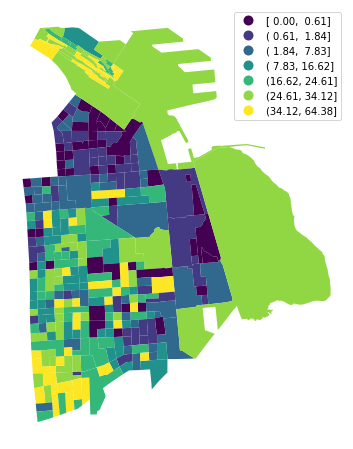

In [109]:
f, ax = plt.subplots(1,figsize=(8,8))
#realizamos el mismo mapa, ahora graficando por quintiles
radios_nbi.loc[radios_nbi.COMUNA=='1',:].plot(
    column='NBI',
    linewidth=0.1,
    ax=ax,
    scheme = 'quantiles',
    k=7,legend=True)
ax.set_axis_off()


#### Y el desvio?

No existe funcion que produzca un desvio ponderado, pero sucede que si existe para la covarianza. Sabiendo que el desvío es la raíz cuadrada de la covarianza, podemos calcularlo. Solo es cuestion de tiempo hasya que se incluya el parametro weights en `numpy.std()`

In [111]:
#gracias a :
#https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-numpy
def desvio_ponder(dt):
    """
    Produce un desvio ponderado de NBI a partir del total de HOGARES
    ...
    
    Argumentos
    ---------
    dt     : pandas.DataFrame
            DataFrame que contiene los radios con NBI por COMUNA  
    
    Devuelve
    -------
    desvio : float
            El desvio ponderado de NBI por el total de hogares
    """
    return np.sqrt(np.cov(m = dt.NBI, aweights=dt.HOGARES))


In [112]:
#calculamos la tabla de desvio
tabla_nbi_std = radios_nbi.loc[:,['COMUNA','HOGARES','NBI']].groupby('COMUNA').agg(desvio_ponder)
tabla_nbi_std = tabla_nbi_std.drop('HOGARES',axis=1)
tabla_nbi_std.columns = ['NBI_std']
tabla_nbi_std = tabla_nbi_std.sort_values(by='NBI_std',ascending = False)
tabla_nbi_std.head()

,NBI_std
COMUNA,
1,14.981929
4,12.525059
8,12.109974
7,11.626479
3,10.511633


In [113]:
#utilizaremos la funcion merge para unir ambos datos
tabla = pd.merge(left =  tabla_nbi_pon,right = tabla_nbi_std,left_index=True,right_index=True)
tabla.head()

,NBI_prom,NBI_std
COMUNA,,
1,15.898328,14.981929
4,12.658427,12.525059
3,11.877399,10.511633
8,11.308501,12.109974
7,8.639839,11.626479


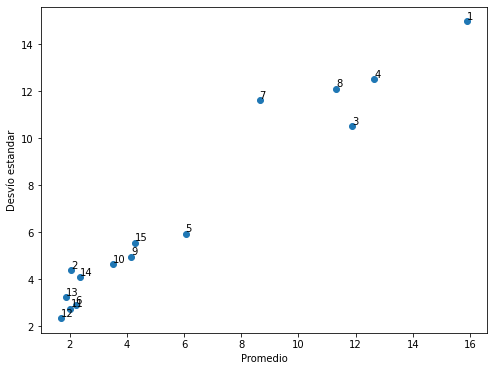

In [114]:
#https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
f, ax = plt.subplots(1,figsize=(8,6))
ax.scatter(tabla.NBI_prom,tabla.NBI_std)

for i, txt in enumerate(tabla.index):
    ax.annotate(txt, (tabla.NBI_prom.iloc[i],
                      tabla.NBI_std.iloc[i]),
                horizontalalignment='left', 
                verticalalignment='bottom')

ax.set_xlabel('Promedio')
ax.set_ylabel(u'Desvío estandar');

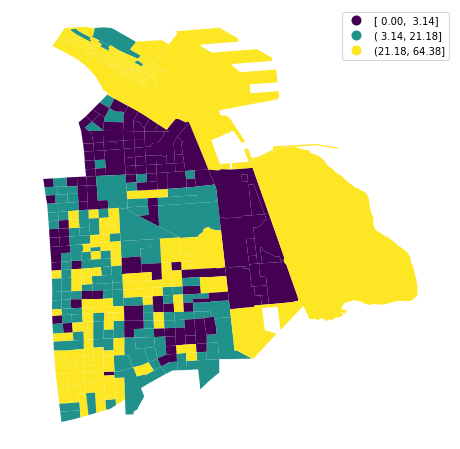

In [116]:
#realizamos el mismo mapa, ahora graficando por terciles para ver la disparidad de la Comuna 1
f, ax = plt.subplots(1,figsize=(8,8))
radios_nbi.loc[radios_nbi.COMUNA == '1',:].plot(
    column='NBI',
    linewidth=0.1, ax=ax, scheme = 'quantiles',k=3,legend=True)
plt.axis('equal')
ax.set_axis_off()

Sin embargo, como la coropleta es una visualización unidimensional, solo podemos captar el efecto de una de las variables. El promedio de NBI. No podemos ver la cantidad de población. Si observan bien en esta coropleta uno puede decir que la Comuna 1 tiene Retiro y Puerto Madero como sectores on muy bajo NBI.

Podemos cambiar la estrategia de visualización y pasar a usar puntos. Esto nos permite visualizar 2 variables al mismo tiempo. Para ello cambiamos las geometrias de poligonos a puntos obteniendo el **centroide** de cada poligono.

In [119]:
#seleccionamos Comuna 1 y algunas variables
centroides = radios_nbi.loc[radios_nbi.COMUNA == '1',['NBI','POBLACION','geometry']]
centroides.head()

,NBI,POBLACION,geometry
1_1_1,29.230769,336.0,"POLYGON ((-58.37189 -34.59199, -58.37202 -34.5..."
1_12_1,21.551724,341.0,"POLYGON ((-58.38593 -34.60444, -58.38575 -34.6..."
1_12_10,0.990099,296.0,"POLYGON ((-58.37879 -34.60528, -58.37741 -34.6..."
1_12_11,5.147059,528.0,"POLYGON ((-58.36733 -34.60562, -58.36713 -34.6..."
1_12_2,12.403101,229.0,"POLYGON ((-58.38454 -34.60436, -58.38311 -34.6..."


In [120]:
#ccambiamos la geometria a centroide
centroides.loc[:,'geometry'] = centroides.geometry.centroid
centroides.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,NBI,POBLACION,geometry
1_1_1,29.230769,336.0,POINT (-58.36825 -34.58713)
1_12_1,21.551724,341.0,POINT (-58.38520 -34.60504)
1_12_10,0.990099,296.0,POINT (-58.37685 -34.60525)
1_12_11,5.147059,528.0,POINT (-58.37161 -34.60571)
1_12_2,12.403101,229.0,POINT (-58.38378 -34.60495)


Podemos visualizar esto en forma de puntos a partir de los centroides, lo que nos permite visualizar dos variables usando tamaños y colores


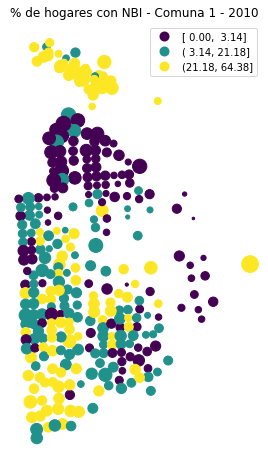

In [125]:
#usamos markersize para mostrar la poblacion
f, ax = plt.subplots(1,figsize=(8,8))
centroides.plot(column='NBI',
                ax=ax, scheme = 'quantiles',k=3,
                legend=True, markersize = centroides.POBLACION/7)
ax.set_axis_off()
ax.set_title('% de hogares con NBI - Comuna 1 - 2010')
f.savefig('centroides_comuna1.png')

## Expandir o contraer, amplificando o reduciendo diferencias

In [126]:
# tomemos una serie
s = pd.Series([10,20,80]) 
s

0    10
1    20
2    80
dtype: int64

In [127]:
s_constante = s/10
print('La diferencia entre el primero y el segundo es del %.2f por ciento' % (s_constante.loc[1]/s_constante.loc[2] * 100))
s_constante

La diferencia entre el primero y el segundo es del 25.00 por ciento


0    1.0
1    2.0
2    8.0
dtype: float64

In [128]:
s_sqrt = s ** 0.5
print('La diferencia entre el primero y el segundo es del %.2f por ciento' % (s_sqrt.loc[1]/s_sqrt.loc[2] * 100))
s_sqrt

La diferencia entre el primero y el segundo es del 50.00 por ciento


0    3.162278
1    4.472136
2    8.944272
dtype: float64

In [131]:
s_2 = s ** 2
print('La diferencia entre el primero y el segundo es del %.2f por ciento' % (s_2.loc[1]/s_2.loc[2] * 100))
s_2

La diferencia entre el primero y el segundo es del 6.25 por ciento


0     100
1     400
2    6400
dtype: int64

Text(0.5, 1.0, '% de hogares con NBI - Comuna 1 - 2010')

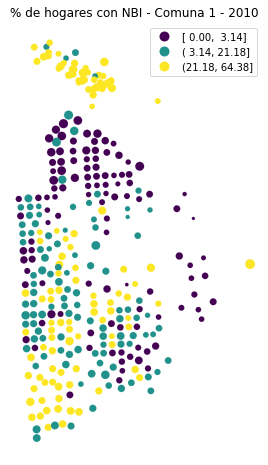

In [132]:
# el size varia de un modo diferente cuando usamos raiz cuadrada o exponentes. amplia las diferencias
f, ax = plt.subplots(1,figsize=(8,8))
centroides.plot(column='NBI',linewidth=0.1, 
                ax=ax, scheme = 'quantiles',k=3,
                legend=True, markersize = centroides.POBLACION**0.6)
ax.set_axis_off()
ax.set_title('% de hogares con NBI - Comuna 1 - 2010')

Text(0.5, 1.0, '% de hogares con NBI - Comuna 1 - 2010')

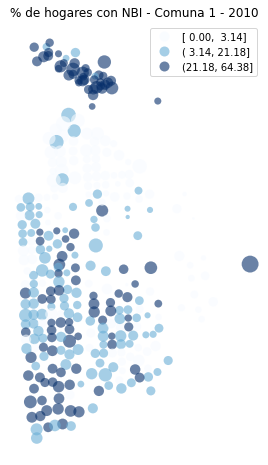

In [133]:
# Usando una paleta de un solo color podemos jugar con la sensacion de ausencia - presencia
f, ax = plt.subplots(1,figsize=(8,8))
centroides.plot(column='NBI',linewidth=0.1, 
                ax=ax, scheme = 'quantiles',k=3,
                legend=True, markersize = centroides.POBLACION/7,
                cmap = 'Blues',
                alpha = .6)
ax.set_axis_off()
ax.set_title('% de hogares con NBI - Comuna 1 - 2010')

## La Cartografia de comunas

In [134]:
#ya tenemos los datos, pero necesitamos una cartografia de comunas
#si bien existe y podemos bajarla, podríamos crearla a partir de agregar o disolver unidades espaciales existentes
comunas = radios.dissolve('COMUNA')
comunas.head()

,geometry,RADIO_ID,BARRIO,POBLACION,VIVIENDAS,HOGARES,HOGARES_NBI,AREA_KM2,NBI
COMUNA,,,,,,,,,
1,"POLYGON ((-58.38706 -34.63390, -58.38796 -34.6...",1_1_1,RETIRO,336.0,82.0,65.0,19.0,1.798997,29.230769
10,"POLYGON ((-58.50324 -34.64504, -58.50375 -34.6...",10_1_1,VILLA REAL,641.0,300.0,250.0,7.0,0.077003,2.800000
11,"POLYGON ((-58.47614 -34.62228, -58.47721 -34.6...",11_1_1,VILLA DEVOTO,1032.0,370.0,324.0,0.0,0.146151,0.000000
12,"POLYGON ((-58.50022 -34.59276, -58.50133 -34.5...",12_1_1,SAAVEDRA,581.0,216.0,191.0,1.0,0.277458,0.523560
13,"POLYGON ((-58.44232 -34.57649, -58.44213 -34.5...",13_1_1,NUÑEZ,733.0,393.0,296.0,1.0,0.089419,0.337838


In [135]:
#vemos que los datos no nos sirvem porque no son un agregado, sino los del primer registro de cada comuna. entonces los eliminamos
comunas = comunas.reindex(columns = ['geometry'])
comunas.head(2)

,geometry
COMUNA,
1,"POLYGON ((-58.38706 -34.63390, -58.38796 -34.6..."
10,"POLYGON ((-58.50324 -34.64504, -58.50375 -34.6..."


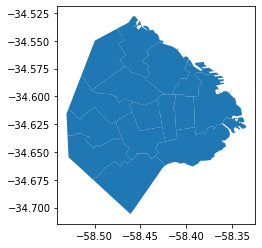

In [136]:
#ploteamos
comunas.plot()

## Unir los datos

In [ ]:
tabla.head()

In [137]:
#Ya tenemos nuestra cartografia y nuetros datos
#podemos hacerlo por comunas en comun o por el indice
comunas = comunas.merge(tabla,left_index=True,right_index=True)
comunas['cv'] = comunas.NBI_prom / comunas.NBI_std * 100
comunas.head()

,geometry,NBI_prom,NBI_std,cv
COMUNA,,,,
1,"POLYGON ((-58.38706 -34.63390, -58.38796 -34.6...",15.898328,14.981929,106.116699
10,"POLYGON ((-58.50324 -34.64504, -58.50375 -34.6...",3.496981,4.627530,75.569066
11,"POLYGON ((-58.47614 -34.62228, -58.47721 -34.6...",2.020711,2.726924,74.102208
12,"POLYGON ((-58.50022 -34.59276, -58.50133 -34.5...",1.699619,2.340494,72.617982
13,"POLYGON ((-58.44232 -34.57649, -58.44213 -34.5...",1.874183,3.227984,58.060495


In [ ]:
plt.subplots?

0 1
1 10
2 11
3 12
4 13
5 14
6 15
7 2
8 3
9 4
10 5
11 6
12 7
13 8
14 9


Text(0.5, 1.0, 'Hogares con NBI - Coeficiente de variación (en %) - Por Comuna - 2010')

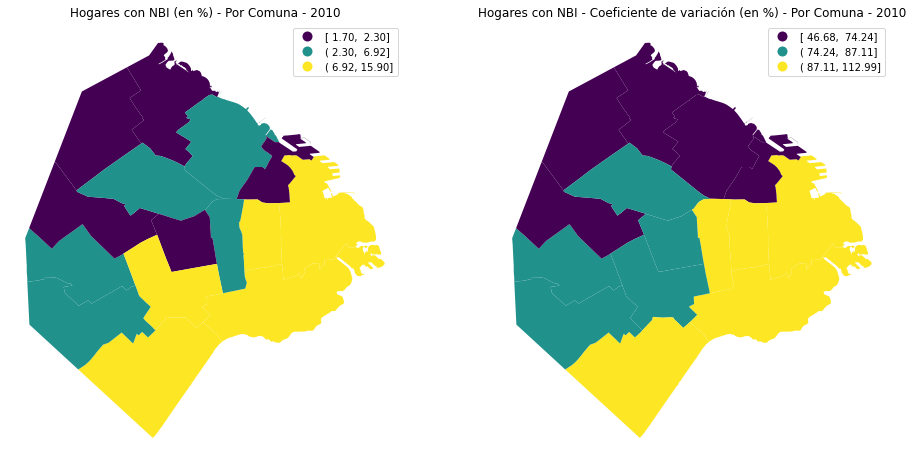

In [148]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
comunas.plot(column = 'NBI_prom',ax=ax1,scheme='quantiles',k=3,legend=True)

for i, txt in enumerate(comunas.index):
    ax1.annotate(txt, (comunas.loc[txt].geometry.centroid.x,
                      comunas.loc[txt].geometry.centroid.y),
                horizontalalignment='left', 
                verticalalignment='bottom')
    

comunas.plot(column = 'cv',ax=ax2,scheme='quantiles',k=3,legend=True)
ax1.set_axis_off()
ax2.set_axis_off()
ax1.set_title('Hogares con NBI (en %) - Por Comuna - 2010')
ax2.set_title('Hogares con NBI - Coeficiente de variación (en %) - Por Comuna - 2010')

# 5 - Mapas base

In [139]:
#importamos una libreria para superponer mapas
import contextily as ctx

''

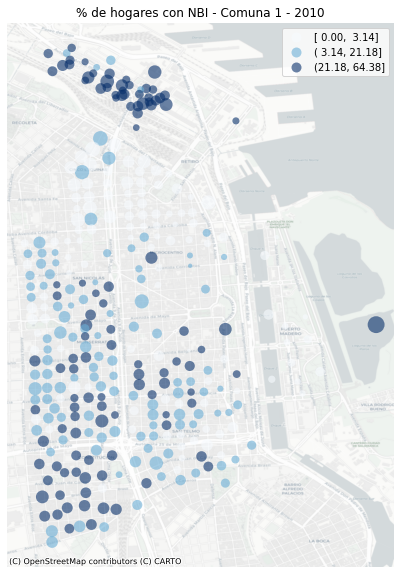

In [140]:
f,ax = plt.subplots(figsize=(10, 10))
centroides.plot(column='NBI',linewidth=0.1, 
                ax=ax, scheme = 'quantiles',k=3,
                legend=True, markersize = centroides.POBLACION/7,
                cmap = 'Blues',
                alpha = .6)
ax.set_title('% de hogares con NBI - Comuna 1 - 2010')
ax.set_axis_off()

ctx.add_basemap(ax,
                source = ctx.providers.CartoDB.Positron,
                crs = centroides.crs.to_string())
;

In [141]:
#podemos chequear cada proveedor de mapas base
dir(ctx.providers)

['BasemapAT',
 'CartoDB',
 'Esri',
 'FreeMapSK',
 'GeoportailFrance',
 'HERE',
 'HikeBike',
 'Hydda',
 'JusticeMap',
 'MapBox',
 'MtbMap',
 'NASAGIBS',
 'NLS',
 'OneMapSG',
 'OpenFireMap',
 'OpenMapSurfer',
 'OpenPtMap',
 'OpenRailwayMap',
 'OpenSeaMap',
 'OpenStreetMap',
 'OpenTopoMap',
 'OpenWeatherMap',
 'SafeCast',
 'Stamen',
 'Thunderforest',
 'Wikimedia',
 'nlmaps']

In [142]:
#y cada tipo dentro de cada proveedor
dir(ctx.providers.CartoDB)

['DarkMatter',
 'DarkMatterNoLabels',
 'DarkMatterOnlyLabels',
 'Positron',
 'PositronNoLabels',
 'PositronOnlyLabels',
 'Voyager',
 'VoyagerLabelsUnder',
 'VoyagerNoLabels',
 'VoyagerOnlyLabels']

In [143]:

from palettable.colorbrewer.sequential import RdPu_5_r
cmap = ListedColormap(RdPu_5_r.mpl_colors)



''

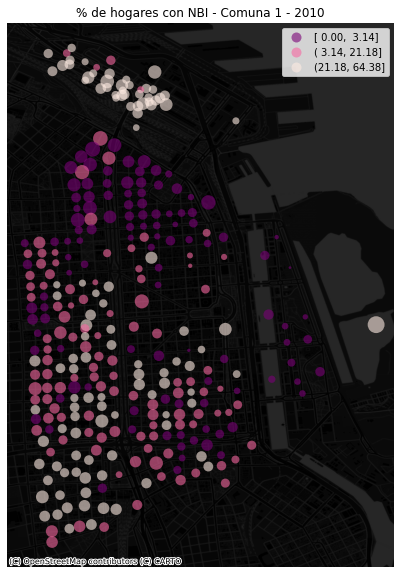

In [144]:
f,ax = plt.subplots(figsize=(10, 10))
centroides.plot(column='NBI',linewidth=0.1, 
                ax=ax, scheme = 'quantiles',k=3,
                legend=True, markersize = centroides.POBLACION/7,
                cmap = cmap,alpha = 0.6)
ax.set_title('% de hogares con NBI - Comuna 1 - 2010')
ax.set_axis_off()
ctx.add_basemap(ax,
                source = ctx.providers.CartoDB.DarkMatterNoLabels,
                crs = centroides.crs.to_string())
;